Assignment - 3

Model Interpretability


Fit a linear model and interpret the regression coefficients

Fit a tree-based model and interpret the nodes

Use auto ml to find the best model

Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

In [ ]:
!pip install h2o

In [ ]:

!apt-get install graphviz -y
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
!pip install shap

In [ ]:
#Importing required packages
from sklearn.tree import export_graphviz
import graphviz
import h2o
from h2o.automl import H2OAutoML
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = None
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 mins 59 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_x003er
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


import h2o: Imports the h2o library, which is a tool for building machine learning models. It's particularly useful for distributed and scalable machine learning tasks.

from h2o.automl import H2OAutoML: Imports the H2OAutoML class from the h2o.automl module. This class is used for automating the machine learning model selection and training process.

import numpy as np: Imports the numpy library and aliases it as np. Numpy is widely used for numerical operations in Python.

import pandas as pd: Imports the pandas library and aliases it as pd. Pandas is a powerful data manipulation library, and it's commonly used for working with tabular data.

import seaborn as sns: Imports the seaborn library, which is used for statistical data visualization. It provides a high-level interface for creating informative and attractive statistical graphics.

import matplotlib.pylab as plt: Imports the matplotlib.pylab module and aliases it as plt. Matplotlib is a popular plotting library in Python.

from sklearn.ensemble import RandomForestRegressor: Imports the RandomForestRegressor class from the sklearn.ensemble module. This is part of the scikit-learn library and is used for building random forest models, which are an ensemble of decision trees for regression tasks.

pd.options.display.max_columns = None: This line sets a Pandas option to display all columns when printing a DataFrame. By setting it to None, it allows you to see all the columns in a DataFrame without truncation

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [ ]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


Logistic Regression ( Linear model )

In [ ]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator
from sklearn.model_selection import train_test_split
import pandas as pd


# Split data into features and target
X = data.drop('Price', axis=1)
y = data['Price'] #y is target

# Convert Pandas Series to Pandas DataFrame
y = pd.DataFrame(y)

# Convert Pandas DataFrames back to H2OFrame objects
X_h2o = h2o.H2OFrame(X)
y_h2o = h2o.H2OFrame(y)

# Concatenate X and y to create the complete dataset
data_h2o = X_h2o.concat(y_h2o)

# Split the data into training and test sets using H2O split_frame function
train, test = data_h2o.split_frame(ratios=[0.8], seed=42)

# Train the logistic regression model
logistic_model = H2OGeneralizedLinearEstimator(family="gaussian")
logistic_model.train(x=list(X.columns), y="Price", training_frame=train)

# Print a summary of the model
print(logistic_model)

# Make predictions on the test set
predictions = logistic_model.predict(test)

# Evaluate the model
performance = logistic_model.model_performance(test)
print(performance)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1710647738361_1


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 8.25E-4 )  43                            33                             2                       py_3_sid_a80f

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MS

Obtaining the Regression Coefficients

In [ ]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator
import pandas as pd

# Initialize and start the H2O cluster
h2o.init()

# Assuming you have loaded your data into a DataFrame called datainpandas
# Split data into features and target
X = data.drop('Price', axis=1)
y = data['Price']

# Convert Pandas Series to Pandas DataFrame
y = pd.DataFrame(y)

# Convert Pandas DataFrames back to H2OFrame objects
X_h2o = h2o.H2OFrame(X)
y_h2o = h2o.H2OFrame(y)

# Concatenate X and y to create the complete dataset
data_h2o = X_h2o.concat(y_h2o)

# Split the data into training and test sets using H2O split_frame function
train, test = data_h2o.split_frame(ratios=[0.8], seed=42)

# Train the linear regression model
linear_model = H2OGeneralizedLinearEstimator(family="gaussian")
linear_model.train(x=X.columns.tolist(), y="Price", training_frame=train)

# Print a summary of the model
print(linear_model)

# Retrieve the regression coefficients
coefficients = linear_model.coef()

# Provide an explanation of the coefficients
print("\nExplanation of Regression Coefficients:")
print("Intercept: ", coefficients['Intercept'])  # Intercept
for name, coef in coefficients.items():
    if name != 'Intercept':
        print(f"{name}: {coef}")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,9 mins 24 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_x003er
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1710647738361_2


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 8.25E-4 )  43                            33                             2                       py_7_sid_ad56

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MS

The coefficients come from a regression model that predicts the log-transformed price of laptops based on various features like company, type, CPU brand, GPU brand, operating system, RAM, weight, whether it has a touchscreen, IPS display, pixels per inch (PPI), HDD size, and SSD size. Here's a simplified explanation:

- **Intercept (9.9592):** This is the base value for the log-transformed price when all other features are zero. It's the starting point for predictions before considering the effects of the features.

- **Company Coefficients (e.g., Company.Acer: -0.1863):** These coefficients represent the impact of the laptop's brand on its log-transformed price relative to the baseline category (not shown here, often the one omitted to avoid dummy variable trap). A negative value (e.g., Acer, -0.1863) indicates that, all else being equal, laptops from this brand are expected to be cheaper than the baseline brand. A positive value suggests a brand is associated with higher prices. Brands with a coefficient of 0 (e.g., Fujitsu, Huawei) have no effect on the price prediction relative to the baseline, under the model.

- **Type Coefficients (e.g., TypeName.Ultrabook: 0.0633):** Reflect the impact of the laptop type on its price. For instance, Ultrabooks are associated with a slight increase in price, while Notebooks and Netbooks decrease it.

- **CPU, GPU, OS Coefficients:** Similar to company coefficients, these indicate how the choice of CPU, GPU, and operating system impacts the log-transformed price relative to their respective baselines. Positive values increase the price, negative values decrease it, and zeros have no effect.

- **Ram, Weight, TouchScreen, Ips, Ppi, HDD, SSD:** These coefficients show the effect of continuous variables on the laptop's price. For RAM and weight, the coefficients are positive, indicating that higher values in these features increase the laptop's price. The Ppi (pixels per inch) also positively affects the price, albeit very slightly, suggesting a minimal impact. The HDD and SSD coefficients, though positive, indicate a very small effect per unit increase in storage size. The touchscreen feature has a negative coefficient, suggesting that, all else equal, laptops with touchscreens might be slightly cheaper, which might require further investigation as it's counterintuitive.

The coefficients tell us how each feature is expected to influence the log-transformed price of a laptop, holding all other features constant. Positive coefficients increase the price, negative coefficients decrease it, and zero coefficients mean no change in price due to that feature.

Decision Tree (Tree based model)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error

# Split data into features and target
X = data.drop('Price', axis=1)
y = data['Price']

# Define categorical and numerical features
categorical_features = ['Gpu_brand']
numerical_features = [c for c in X.columns if c not in categorical_features]

# Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Using median instead of mean
    ('scaler', StandardScaler())
])

# Create column transformer to apply different preprocessing steps to different feature types
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define the Random Forest Regressor model
regressor = RandomForestRegressor()

# Create a pipeline combining preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Filter out non-numeric values in numerical features
X_numeric = X[numerical_features].apply(pd.to_numeric, errors='coerce')
X_categorical = X[categorical_features]

# Combine the filtered numerical features and categorical features
X_filtered = pd.concat([X_numeric, X_categorical], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.1, shuffle=False)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
train_mae = mean_absolute_error(y_train, pipeline.predict(X_train))
test_mae = mean_absolute_error(y_test, pipeline.predict(X_test))
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

Train MAE: 0.096985595850469, Test MAE: 0.22795216265964252


<BarContainer object of 8 artists>

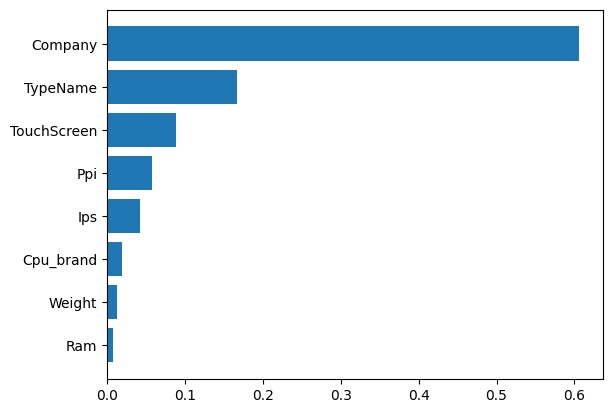

In [ ]:
sorted_idx = pipeline.named_steps['regressor'].feature_importances_.argsort()
features = numerical_features + categorical_features
result = sorted(zip(features, pipeline.named_steps['regressor'].feature_importances_), key=lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

Auto ML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,17 mins 07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_x003er
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = h2o.import_file('https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
col_types = df.types
numerical_cols = [col for col, type in col_types.items() if type in ['int', 'real']]
df_numerical = df[numerical_cols]
print(df_numerical)

  Ram    Weight     Price    TouchScreen    Ips      Ppi    HDD    SSD
    8      1.37  11.1758               0      1  226.983      0    128
    8      1.34  10.7768               0      0  127.678      0      0
    8      1.86  10.3299               0      0  141.212      0    256
   16      1.83  11.8145               0      1  220.535      0    512
    8      1.37  11.4731               0      1  226.983      0    256
    4      2.1    9.96703              0      0  100.455    500      0
   16      2.04  11.6441               0      1  220.535      0      0
    8      1.34  11.0306               0      0  127.678      0      0
   16      1.3   11.2854               0      0  157.351      0    512
    8      1.6   10.622                0      1  157.351      0    256
[1273 rows x 8 columns]



In [ ]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [ ]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

In [ ]:
aml.train(training_frame = train, y = 'Price')

AutoML progress: |██████████████
04:19:34.430: DeepLearning_1_AutoML_1_20240317_41828 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_1_20240317_41828_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


█████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),21/40
# GBM base models (used / total),7/9
# XGBoost base models (used / total),14/28
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240317_41828,0.198701,0.0394822,0.149109,0.0166765,0.0394822
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_41828,0.202559,0.0410301,0.152525,0.0169831,0.0410301
XGBoost_3_AutoML_1_20240317_41828,0.208282,0.0433813,0.159039,0.0175012,0.0433813
XGBoost_grid_1_AutoML_1_20240317_41828_model_3,0.208743,0.0435738,0.156261,0.017525,0.0435738
GBM_5_AutoML_1_20240317_41828,0.208846,0.0436168,0.15622,0.0175059,0.0436168
GBM_grid_1_AutoML_1_20240317_41828_model_3,0.210448,0.0442883,0.159631,0.0176874,0.0442883
GBM_3_AutoML_1_20240317_41828,0.210628,0.0443641,0.156283,0.0176814,0.0443641
XGBoost_grid_1_AutoML_1_20240317_41828_model_13,0.210993,0.044518,0.160192,0.0177289,0.044518
XGBoost_grid_1_AutoML_1_20240317_41828_model_28,0.211817,0.0448663,0.160005,0.0178276,0.0448663
XGBoost_grid_1_AutoML_1_20240317_41828_model_4,0.2122,0.0450287,0.158645,0.0178318,0.0450287


In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240317_41828


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  21/40
# GBM base models (used / total)      7/9
# XGBoost base models (used / total)  14/28
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.00902903059038776
RMSE: 0.09502121126563143
MAE: 0.07197130072295677
RMSLE: 0.007987585090974058
Mean Residual Deviance: 0.00902903059038776
R^2: 0.9764798573093059
Null degrees of freedom: 101

In [ ]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.03699371104875366
RMSE: 0.19233749257166077
MAE: 0.14892934267248967
RMSLE: 0.016213493589635128
Mean Residual Deviance: 0.03699371104875366
R^2: 0.9032328483431511
Null degrees of freedom: 260
Residual degrees of freedom: 239
Null deviance: 99.77934507704035
Residual deviance: 9.655358583724706
AIC: -73.83300465401075

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

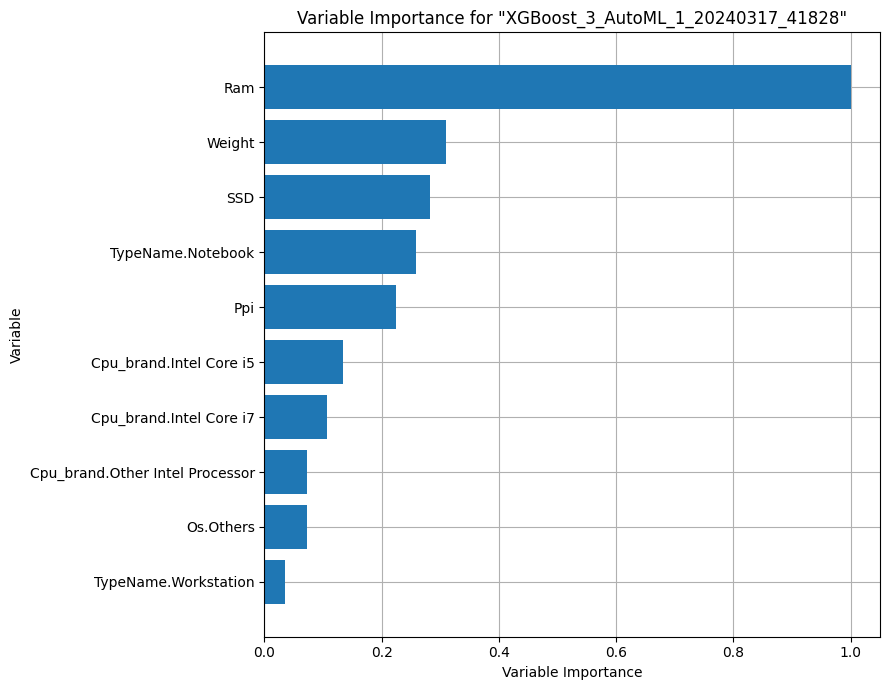

In [ ]:
explain_model = aml.explain(frame = test, figsize = (9,7),include_explanations=['varimp'])

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

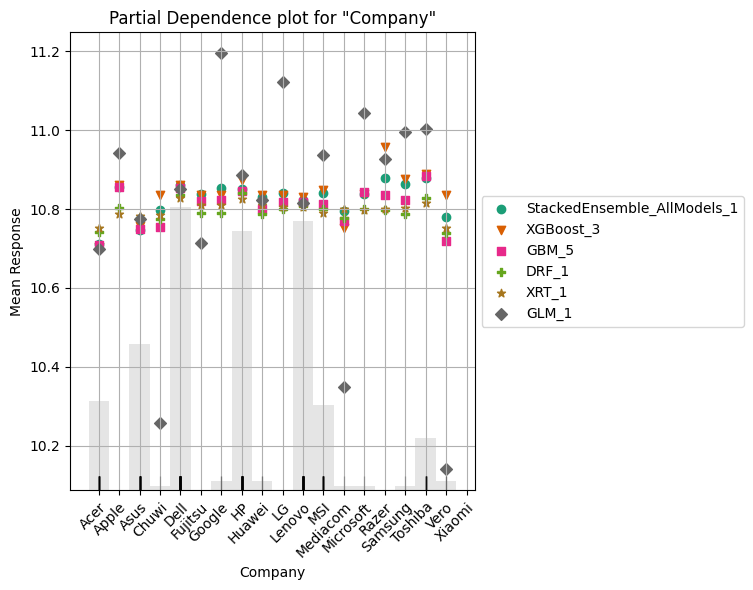

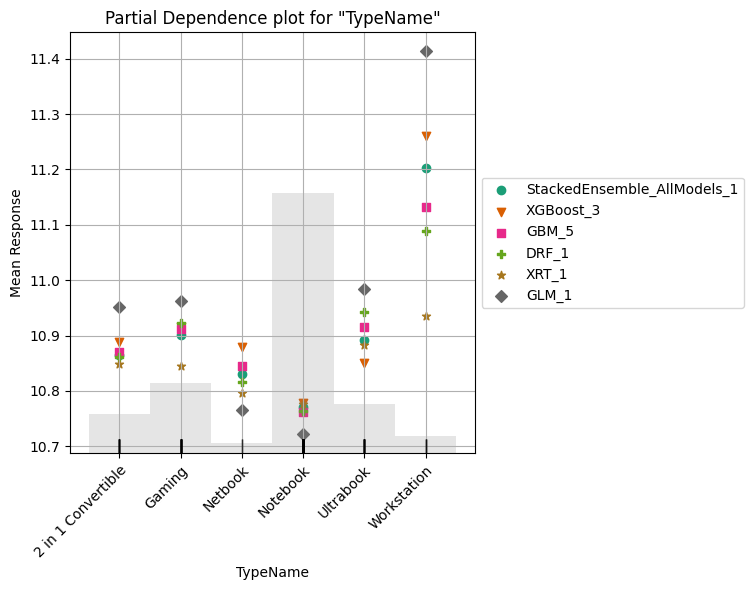

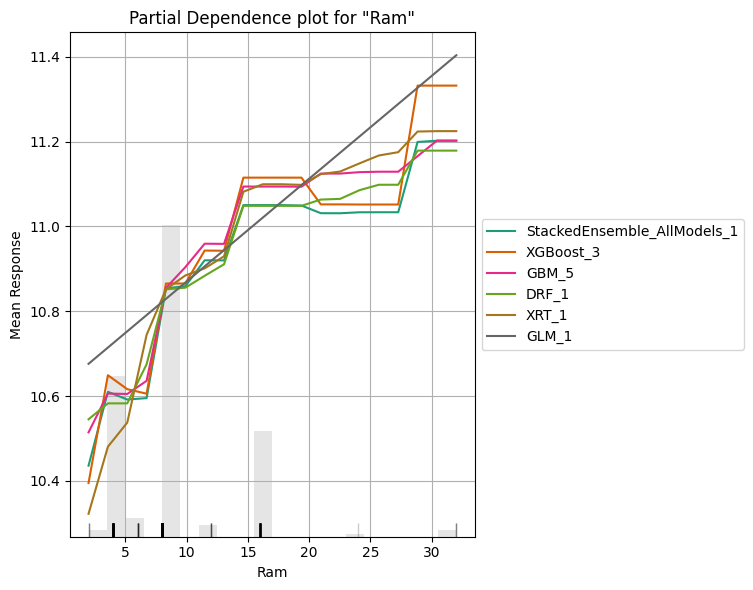

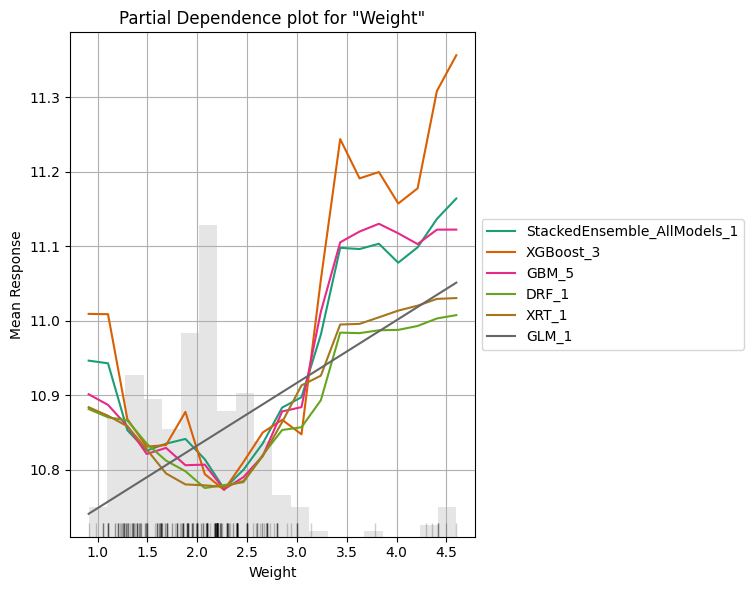

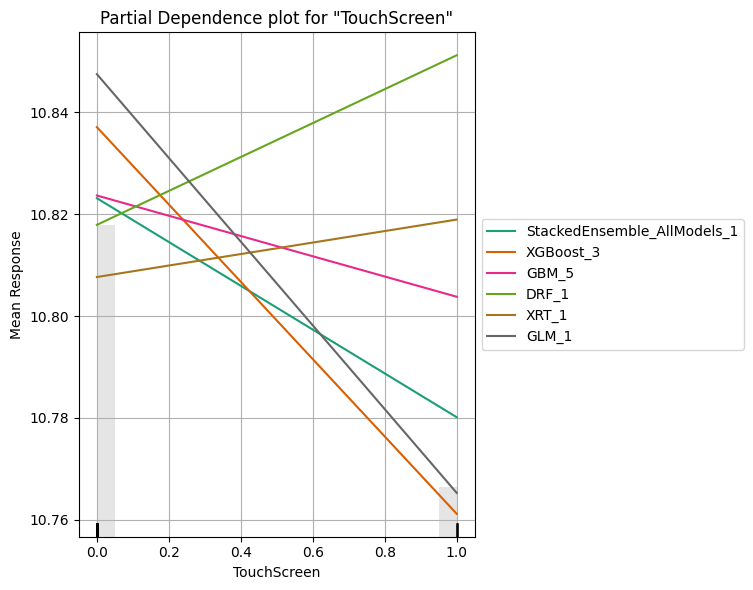

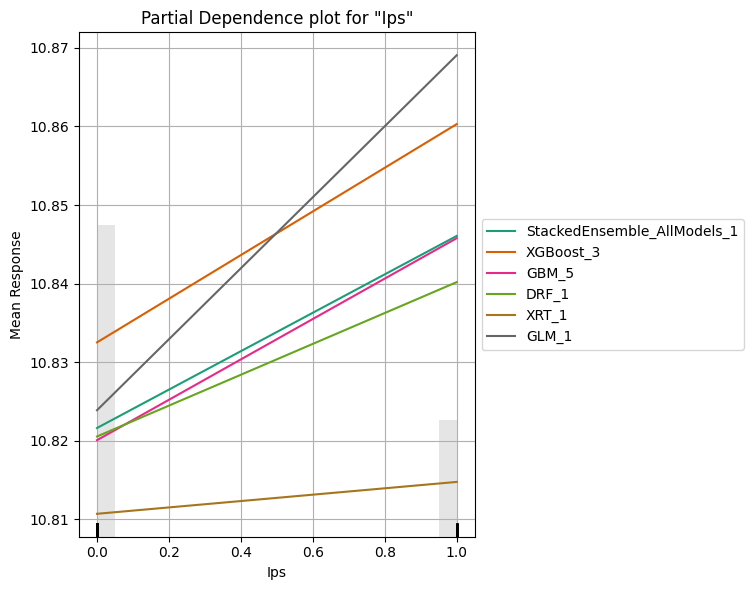

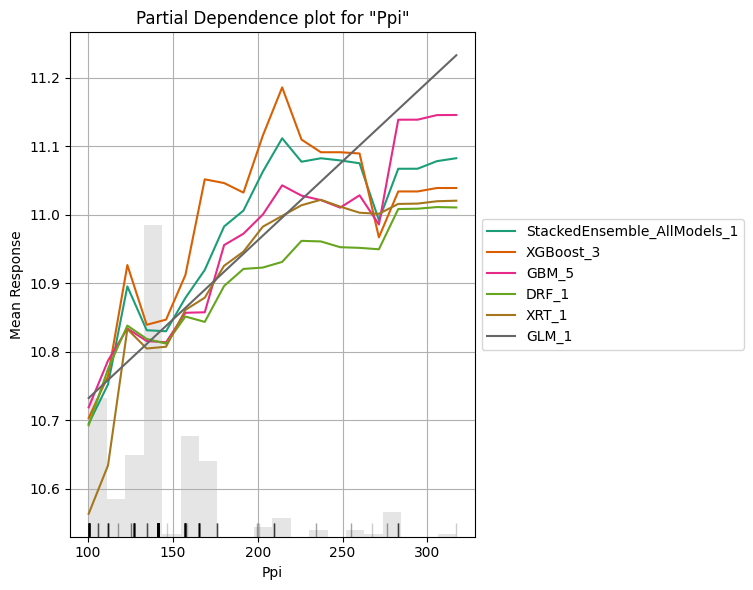

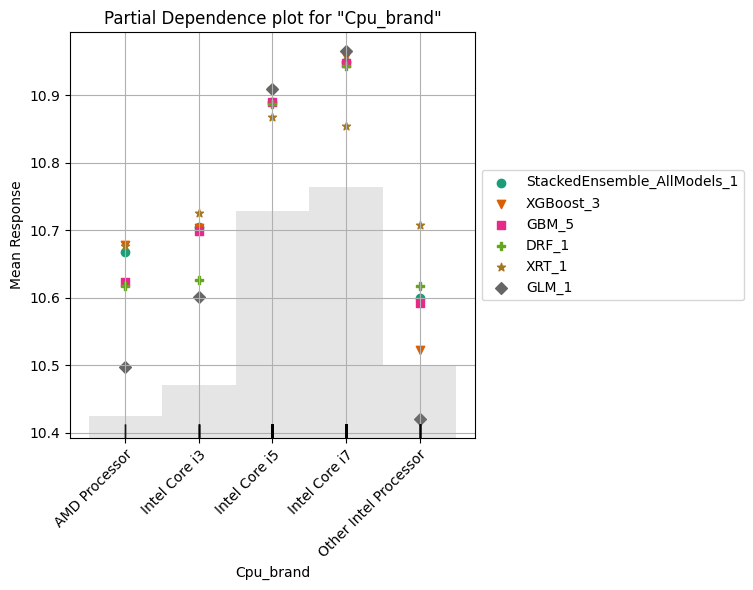

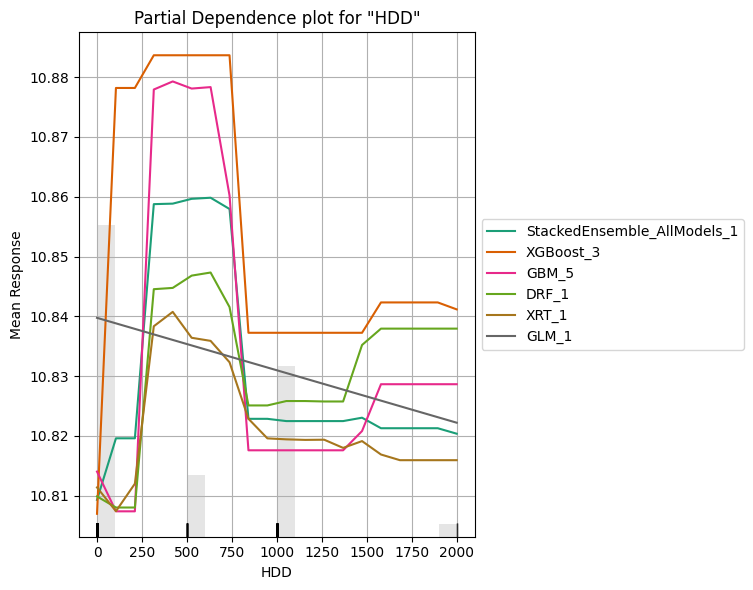

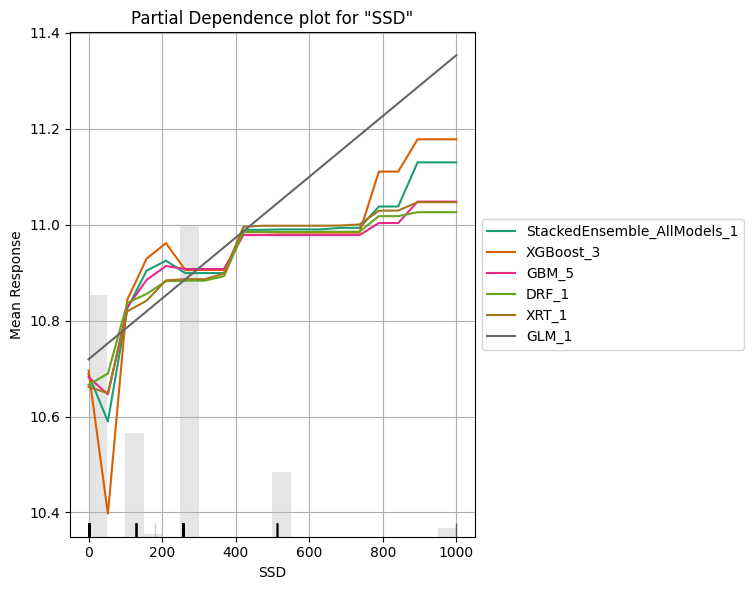

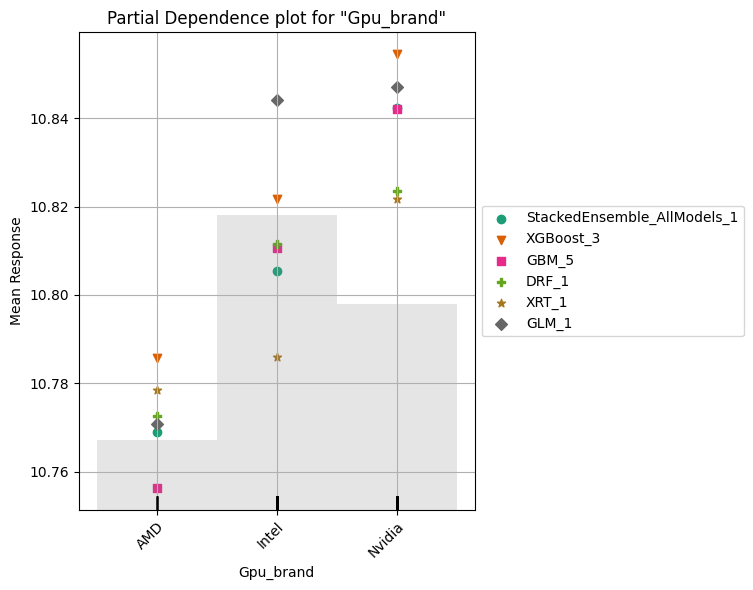

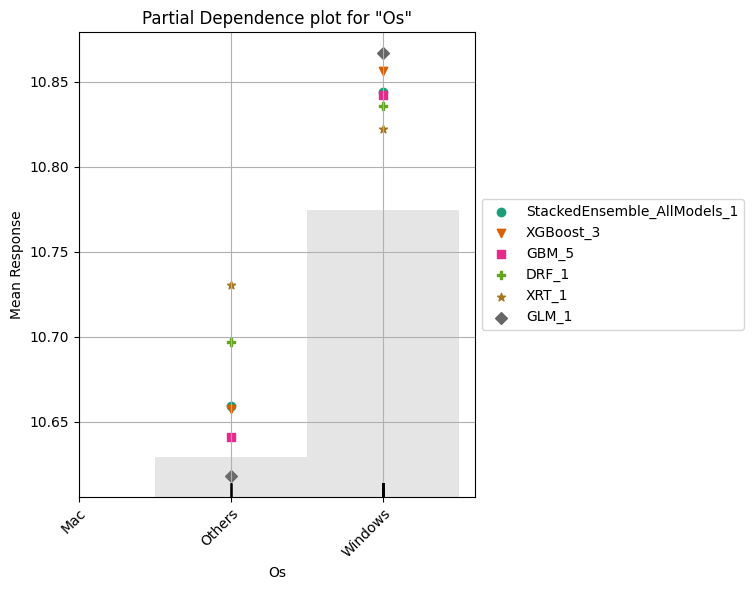

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

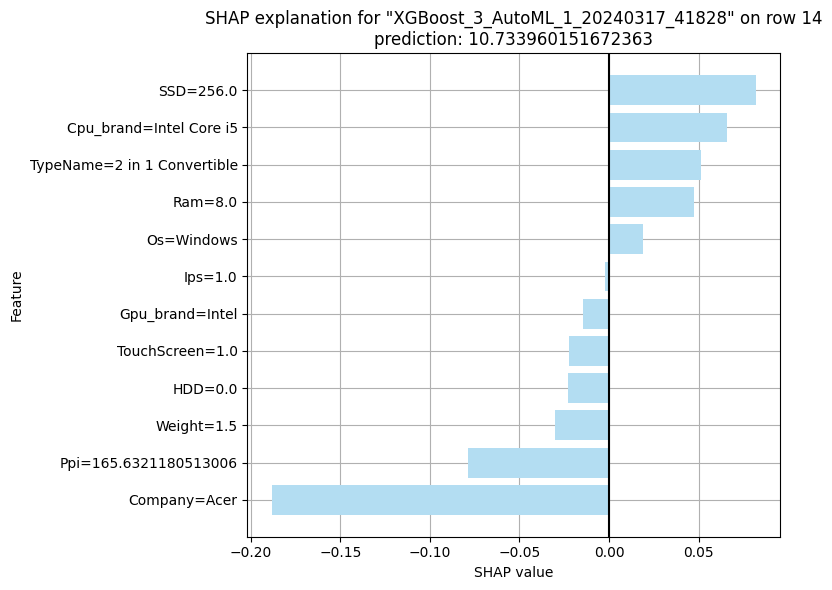

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

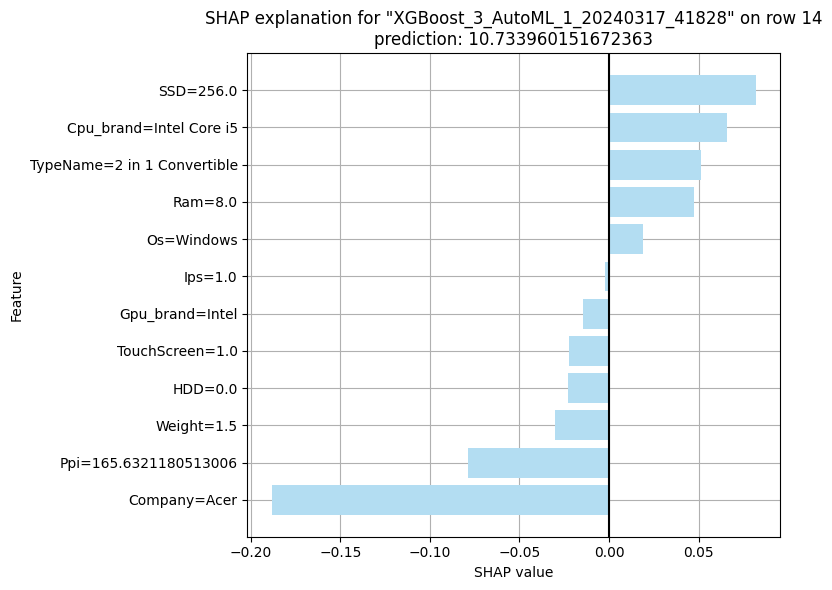

In [ ]:
aml.explain_row(frame = test, row_index = 14, figsize = (8,6), exclude_explanations = "leaderboard")


SHAP Analysis for Linear and Tree-Based Models


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [52]:
data = pd.read_csv("https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv")


In [53]:
X = data.drop('Price', axis=1)  # Assuming 'target' is the column you want to predict
y = data['Price']


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
x_train_numeric = x_train.apply(pd.to_numeric, errors='coerce')

# Fill NaNs that were introduced by the conversion or already present
x_train_filled = x_train_numeric.fillna(method='ffill').fillna(method='bfill')

Linear Model RMSE: 0.2780543049789205
Tree Model RMSE: 0.2114833836471596


PermutationExplainer explainer: 256it [00:18,  7.08it/s]


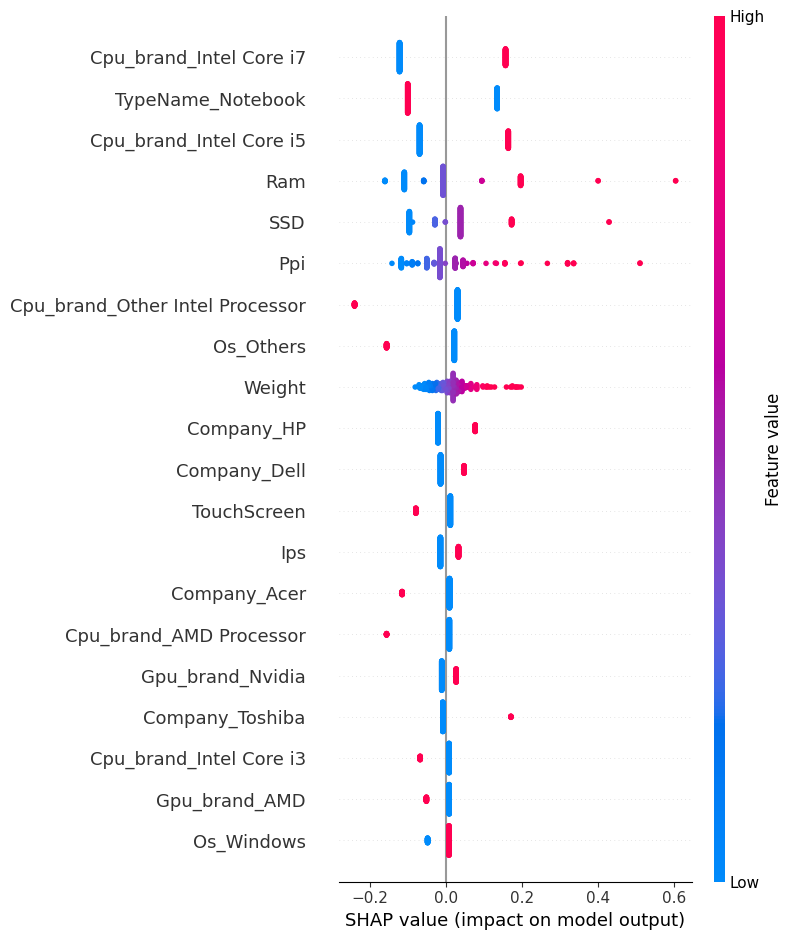

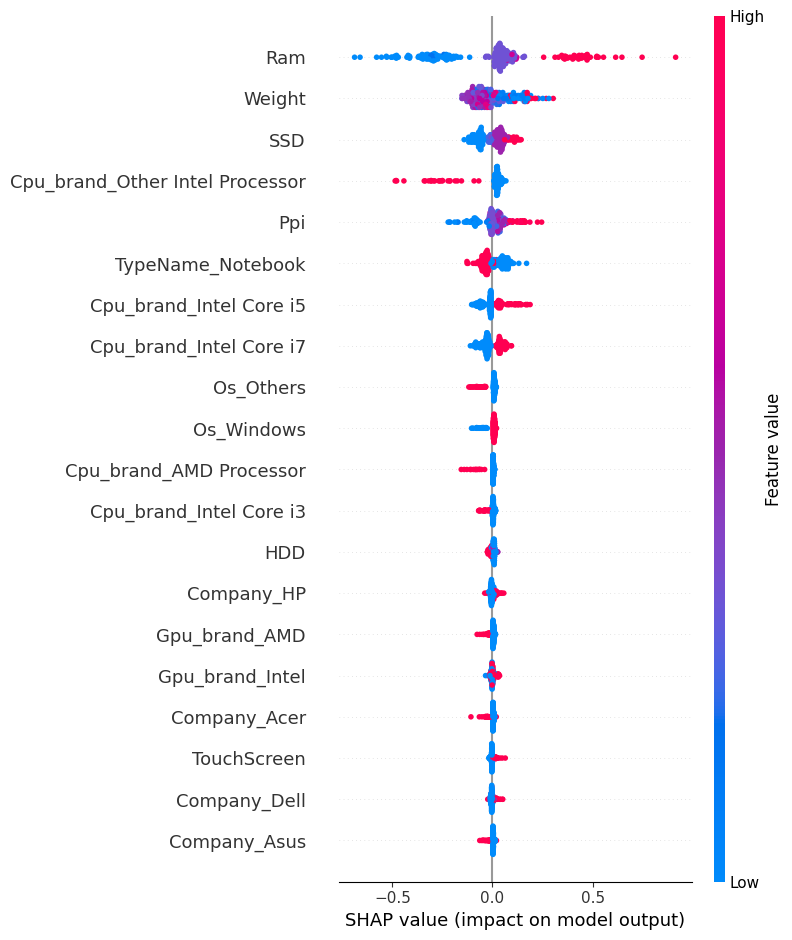

<Figure size 640x480 with 0 Axes>

In [68]:
# Import necessary libraries
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the dataset
laptop_data = pd.read_csv("https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv")
  # Update this path


# Assuming 'Price' is the target and the rest are features. Adjust as necessary.
X = laptop_data.drop('Price', axis=1)
y = laptop_data['Price']

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a tree-based model (Random Forest)
tree_model = RandomForestRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and calculate RMSE for both models
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
print(f"Linear Model RMSE: {sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"Tree Model RMSE: {sqrt(mean_squared_error(y_test, y_pred_tree))}")

# SHAP analysis
# Linear model
explainer_linear = shap.Explainer(linear_model.predict, X_train)
shap_values_linear = explainer_linear(X_test)
shap.summary_plot(shap_values_linear, X_test, feature_names=X.columns)

# Tree-based model
explainer_tree = shap.Explainer(tree_model, X_train)
shap_values_tree = explainer_tree(X_test)
shap.summary_plot(shap_values_tree, X_test, feature_names=X.columns)

# Save plots if running as a script
plt.savefig('linear_model_shap_summary.png')
plt.savefig('tree_model_shap_summary.png')


PermutationExplainer explainer: 256it [00:22,  7.74it/s]


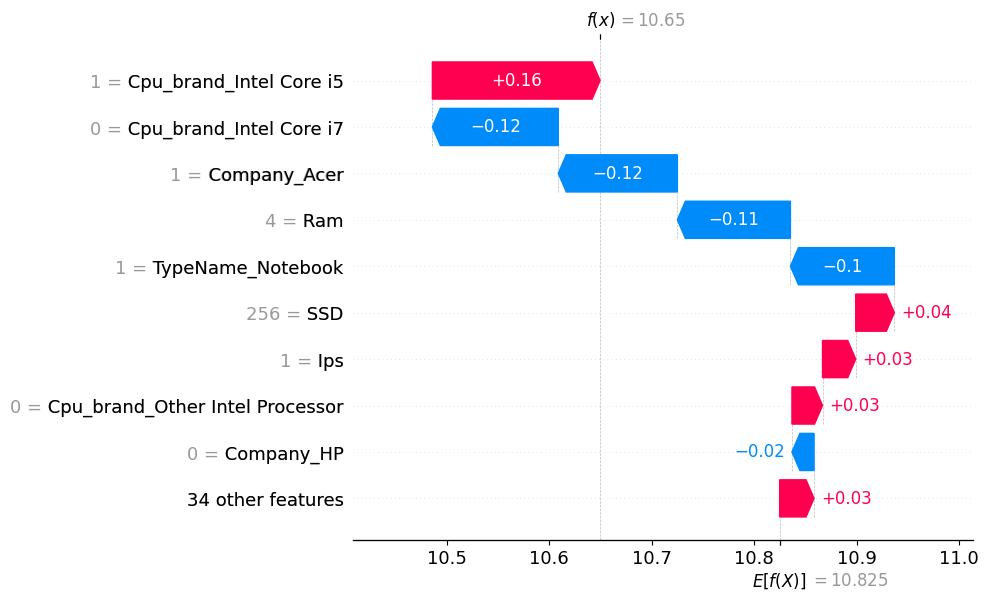

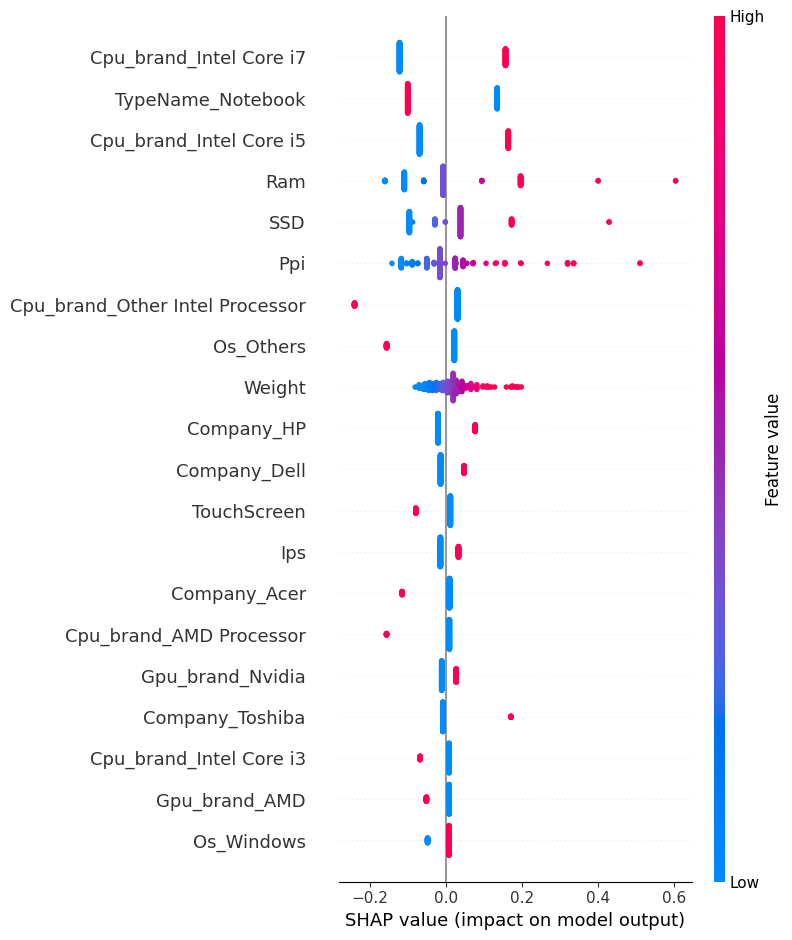

<Figure size 640x480 with 0 Axes>

In [69]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example: Load and prepare your data
# This is a placeholder; replace with your actual data loading and preprocessing
# data = pd.read_csv('your_dataset.csv')
# Assume 'X' and 'y' are your features and target variable
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.Explainer(linear_model.predict, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot SHAP values for the first prediction
# Note: Adjust the index as needed to explore SHAP values for different predictions
shap.plots.waterfall(shap_values[0])

# To display a summary plot of all features across all test data
shap.summary_plot(shap_values, X_test)

# Save the plot if you're running this script in a non-interactive environment
plt.savefig('shap_linear_model_summary.png')


 96%|=================== | 244/255 [00:21<00:00]       

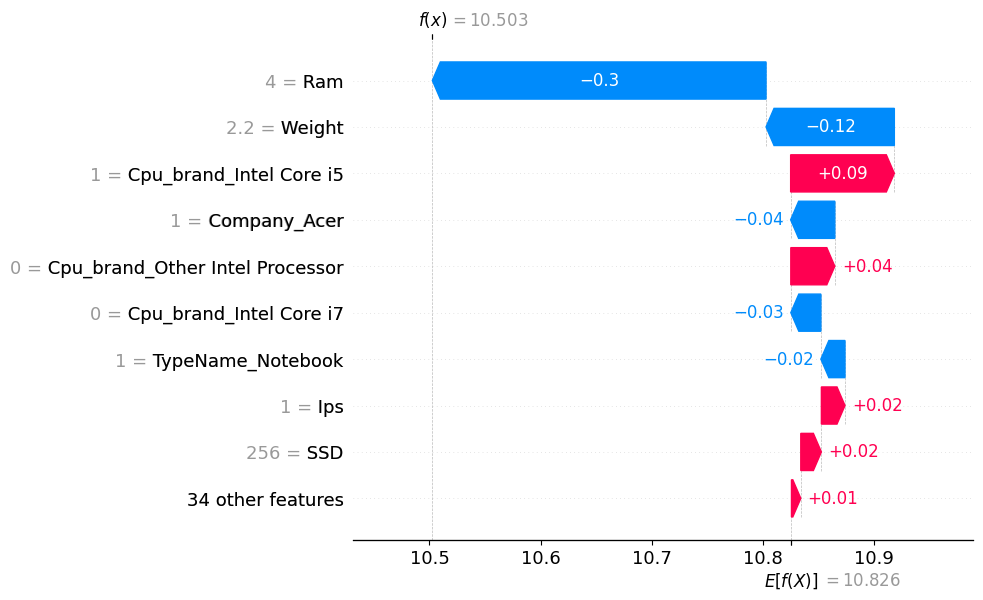

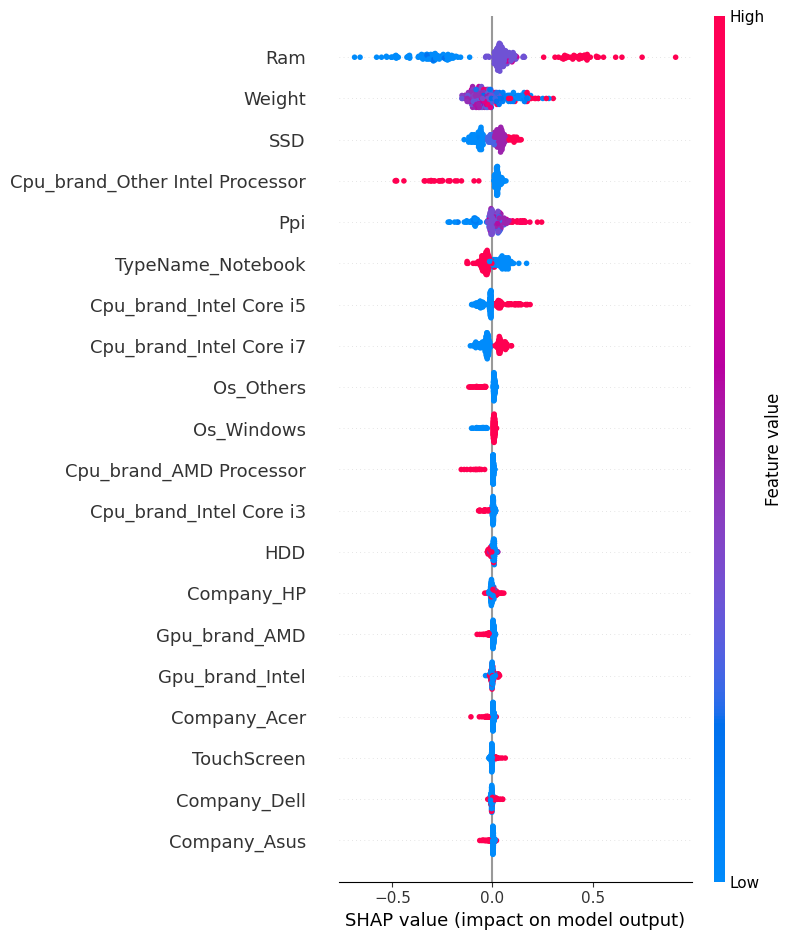

<Figure size 640x480 with 0 Axes>

In [70]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Example: Load and prepare your data
# This is a placeholder; replace with your actual data loading and preprocessing
# data = pd.read_csv('your_dataset.csv')
# Assume 'X' and 'y' are your features and target variable
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a tree-based model (Random Forest in this case)
tree_model = RandomForestRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Initialize SHAP Explainer directly with the model and training data
explainer = shap.Explainer(tree_model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Plot SHAP values for the first prediction in the test set
# Note: Adjust the index as needed to explore SHAP values for different predictions
shap.plots.waterfall(shap_values[0])

# To display a summary plot of all features across all test data
shap.summary_plot(shap_values, X_test)

# Save the plot if you're running this script in a non-interactive environment
plt.savefig('shap_tree_model_summary.png')


SHAP partial dependence plot for linear model


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

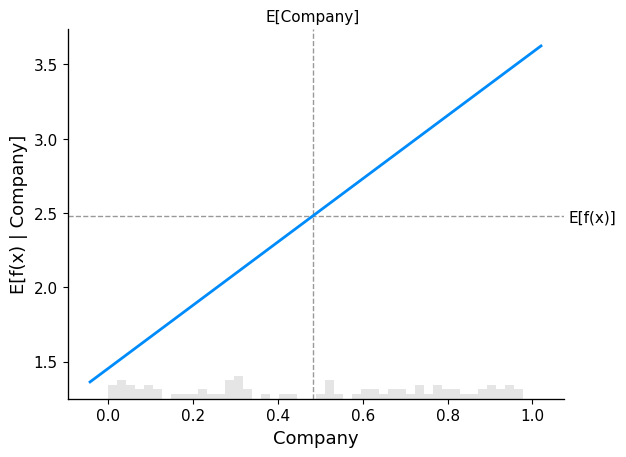

In [76]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example: Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 0.5

# Convert to DataFrame for easier handling
X_df = pd.DataFrame(X, columns=['Company', 'TypeName'])
y_df = pd.Series(y, name='Price')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Train a linear model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.Explainer(model.predict, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Plot the partial dependence plot for the first feature
shap.partial_dependence_plot(
    "Company", model.predict, X_train, model_expected_value=True,
    feature_expected_value=True, ice=False, shap_values=shap_values[:,0]
)


SHAP partial dependence plot for a tree based model

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

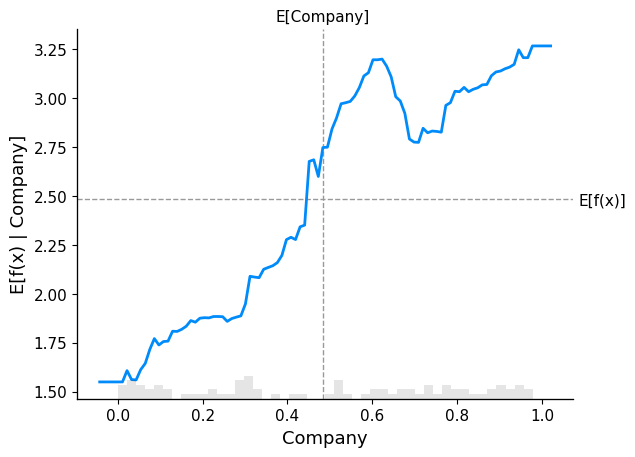

In [77]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Example: Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 0.5

# Convert to DataFrame for easier handling
X_df = pd.DataFrame(X, columns=['Company', 'TypeName'])
y_df = pd.Series(y, name='Price')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Train a tree-based model (Random Forest in this case)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP Explainer with the model and training data
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Plot the partial dependence plot for the first feature
shap.partial_dependence_plot(
    "Company", model.predict, X_train, model_expected_value=True,
    feature_expected_value=True, ice=False, shap_values=shap_values[:,0]
)


Interpreting SHAP dependence plot for Linear and Tree-based model

Interpreting SHAP dependence plots for both linear and tree-based models provides insights into how the value of a specific feature influences the prediction of the model, either globally (across all data points) or for individual predictions. Here’s how to interpret these plots for both types of models:

### Linear Model

For a linear model, SHAP dependence plots can be quite straightforward to interpret because the relationship between features and the target variable is linear by definition. The plot will typically show a straight line indicating that as the feature value increases or decreases, its impact on the prediction linearly increases or decreases in proportion.

- **Slope Direction**: The direction of the slope (positive or negative) tells you whether the relationship between the feature and the target is positive (as the feature value increases, so does the prediction) or negative (as the feature value increases, the prediction decreases).
- **Slope Steepness**: The steepness of the slope indicates the strength of the relationship. Steeper slopes mean the feature has a stronger influence on the prediction.
- **Divergence from Linearity**: While linear models assume a linear relationship, SHAP values can sometimes reveal non-linear patterns if they are present due to interactions with other features. This can be an indication that the linear model is not perfectly capturing the relationship between the feature and the target.

### Tree-based Model

For tree-based models, which can capture non-linear relationships and interactions between features, SHAP dependence plots can reveal more complex patterns:

- **Curve Shape**: Unlike the linear model, the plot for a tree-based model might show curves, indicating non-linear relationships. For example, a U-shaped curve suggests that both high and low values of the feature strongly influence the prediction in the same direction, with a weaker influence from mid-range values.
- **Vertical Dispersion**: We may see a lot of vertical dispersion at a given feature value, indicating variability in the SHAP value for the same feature value. This often points to interactions with other features, meaning the impact of the feature on the prediction changes depending on the values of other features.
- **Color Coding**: SHAP plots often use color to represent the value of another feature, highlighting interactions. For instance, if points are colored by a second feature’s value, and you see a pattern in how colors are distributed across the plot (e.g., all high values of another feature cluster in a specific region of the plot), this indicates an interaction effect between the two features.

### General Interpretation Tips

- **Feature Importance**: In both linear and tree-based models, features with dependence plots showing larger deviations from the baseline prediction are generally more important to the model.
- **Interactions**: For tree-based models, SHAP can explicitly show feature interactions in the dependence plot through color coding. This is less straightforward for linear models, where interactions need to be manually specified in the model.
- **Predictive Insight**: Dependence plots can provide actionable insights. For instance, identifying thresholds where the impact of a feature on the prediction significantly changes can inform decision-making or highlight areas for further investigation.

 SHAP dependence plots offer a powerful tool for understanding the relationship between features and predictions in both linear and tree-based models. By carefully analyzing these plots, you can gain deep insights into the behavior of your models and the underlying data.

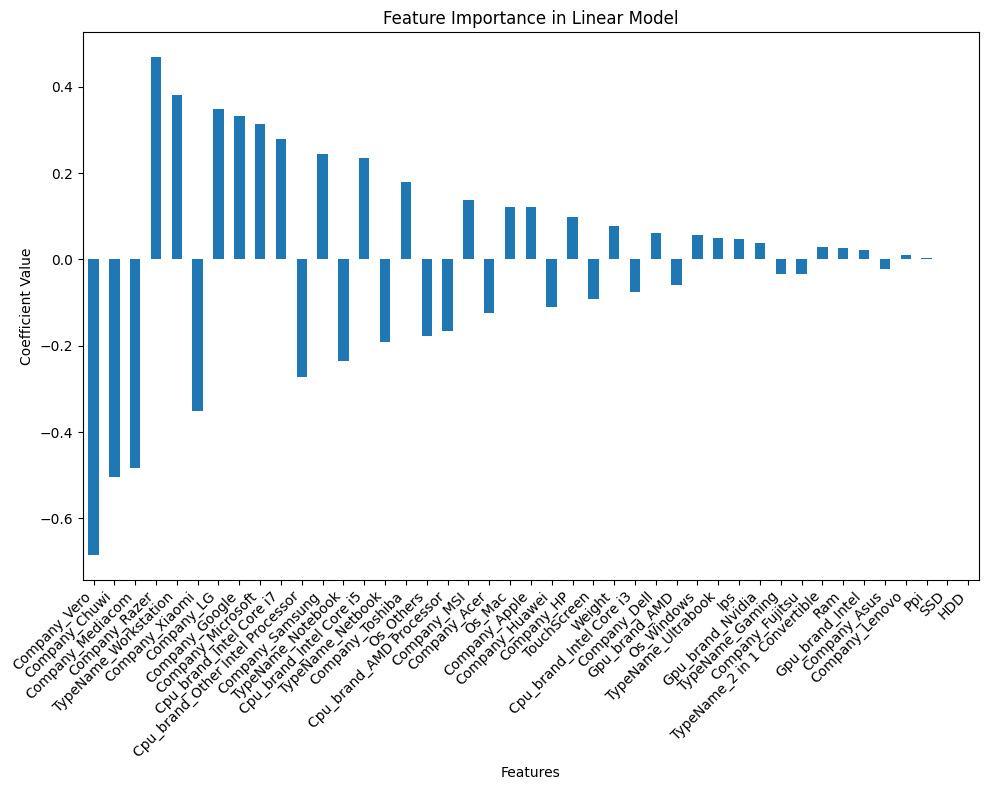

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example: Load and prepare your data
# This is a placeholder; replace with your actual data loading and preprocessing
# data = pd.read_csv('your_dataset.csv')
# Assume 'X' and 'y' are your features and target variable
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get the coefficients from the model
coefficients = linear_model.coef_

# Create a series to store coefficients along with feature names for easier plotting
feature_importance = pd.Series(coefficients, index=X_train.columns).sort_values(key=abs, ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Linear Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()


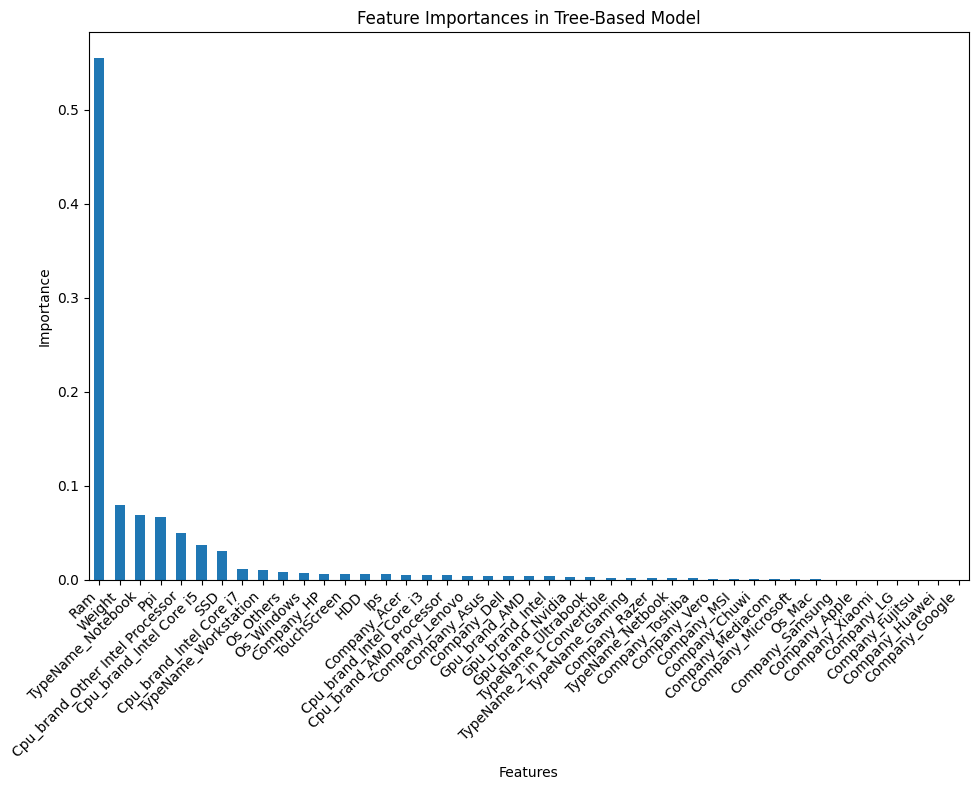

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Example: Load and prepare your data
# This is a placeholder; replace with your actual data loading and preprocessing
# data = pd.read_csv('your_dataset.csv')
# Assume 'X' and 'y' are your features and target variable
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a tree-based model (using Random Forest here as an example)
tree_model = RandomForestRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = tree_model.feature_importances_

# Create a series for easier plotting
features = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
features.plot(kind='bar')
plt.title('Feature Importances in Tree-Based Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()


References

H20.ai- https://docs.h2o.ai/

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - https://chat.openai.com/chat

Github Reference Notes - https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb


MIT License

Copyright (c) 2024 Vamsi2215

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.